In [10]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/Colab Notebooks/

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
class ScratchLinearRegression():
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        
        # 損失を記録する配列を準備
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self,X):
        
        x1 = X
        
        # x0 バイアス項を作成
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
    
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
    
    def _gradient_descent(self, X, error):
        
        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)
     
    def fit(self, X, y, X_val=False, y_val=False):
        
        x1 = self._linear_hypothesis(X)
        
        # パラメータ θ の初期値を乱数で与える
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            
            # 仮説関数を使用して予測を計算する
            y1 = np.dot(x1,self.theta)
            
            # 真の値と予測値の誤差を計算する
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2
            
            # X_valid が入力された場合、x2 として読み取られる
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)
                
                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2 
            
            # 最急降下法でパラメーター θ を最適化する
            self._gradient_descent(x1, error)
            
            if self.verbose:
            # verbose を true に設定した場合の学習過程を出力する
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
                       
    def predict(self, X):

        return np.dot(self._linear_hypothesis(X),self.theta)

In [13]:
# 問題1:仮定関数

# 関数の外でテストする
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
x0 = np.ones(x1.shape[0])
    
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(X.shape[1])

In [14]:
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [15]:
X.shape

(10, 2)

In [16]:
theta

array([0.88681884, 0.02570166])

In [17]:
np.dot(X,theta)

array([0.88681884, 0.9125205 , 0.93822216, 0.96392382, 0.98962548,
       1.01532714, 1.0410288 , 1.06673046, 1.09243212, 1.11813378])

In [18]:
# 問題2:最急降下法

# 関数の外で一度だけ計算する
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)

y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)
theta[0] = theta[0] - alpha*np.mean(error)
theta[1] = theta[1] - alpha*np.mean(error*x1)

In [19]:
np.mean(error)

-0.14063034302623745

In [20]:
np.mean(error*x1)

2.4560943671659694

In [21]:
# シータ計算を一行でやってみる
np.dot(error,X)

array([-1.26567309, 22.1048493 ])

In [22]:
# 一度シータを更新する
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
theta = np.random.random(2)
y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)

theta = theta - alpha*np.dot(error,X)/len(X)
print(theta)

[0.60691574 0.2894562 ]


In [23]:
X.shape

(9, 2)

In [24]:
y1.shape

(9,)

In [25]:
y1.reshape(-1,1)

array([[0.5780402 ],
       [0.73941955],
       [0.9007989 ],
       [1.06217825],
       [1.2235576 ],
       [1.38493695],
       [1.5463163 ],
       [1.70769565],
       [1.869075  ]])

In [26]:
y.shape

(9,)

In [27]:
error.reshape(-1,1)

array([[-1.4219598 ],
       [-3.26058045],
       [-1.0992011 ],
       [ 0.06217825],
       [-4.7764424 ],
       [-5.61506305],
       [-6.4536837 ],
       [-3.29230435],
       [-0.130925  ]])

In [28]:
theta

array([0.60691574, 0.2894562 ])

In [29]:
# 問題3:推定

X = np.random.randn(30,1)
y = np.random.randn(30,)
X_test = np.random.randn(5,1)

In [30]:
X.max()

1.3896947561256667

In [31]:
print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (30, 1)
y.shape (30,)


In [32]:
reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

In [33]:
print(y_pred.shape)

(5,)


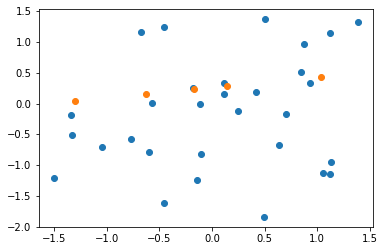

In [34]:
plt.scatter(X,y)
plt.scatter(X_test,y_pred)
plt.plot();

In [35]:
# 問題4:平均2乗誤差

# 平均二乗誤差
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,) 
       推定値
    y : 次の形のndarray, shape (n_samples,)
      correct value

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y)**2)
    
    pass
    return mse

In [36]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])


mse = MSE(y_pred, y_test)
mse

6.8

In [37]:
# 計算結果が正しいかどうかを確認する
from sklearn.metrics import mean_squared_error

y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])

mean_squared_error(y_test, y_pred)

6.8

In [38]:
# 問題５:目的関数

print(reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[1.05720191],
       [1.05706656],
       [1.05693124],
       ...,
       [0.4734043 ],
       [0.47338599],
       [0.47336769]])

In [39]:
# 演習6:学習と推定

# House Pricesの訓練データを読み込む
train = pd.read_csv('train.csv')
print('shape:',train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
X = train[['YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 1)
y.shape: (1460,)


In [41]:
# トレーニングデータと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_valid.shape: (292, 1)
y_valid.shape: (292,)


In [42]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [43]:
reg1 = ScratchLinearRegression(num_iter=10000, lr=0.0001)

reg1.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred1 = reg1.predict(X_valid_std)

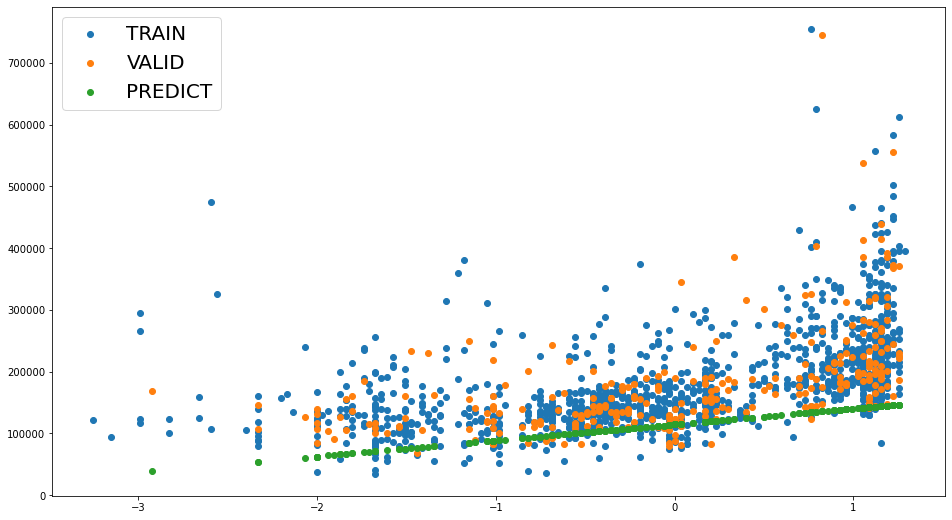

In [44]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred1,label="PREDICT")
plt.legend()
plt.plot();

In [45]:
# 平均二乗誤差
mse = MSE(y_pred1, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE9610117923.1
RMSE98031.2


In [46]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X_train_std,y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

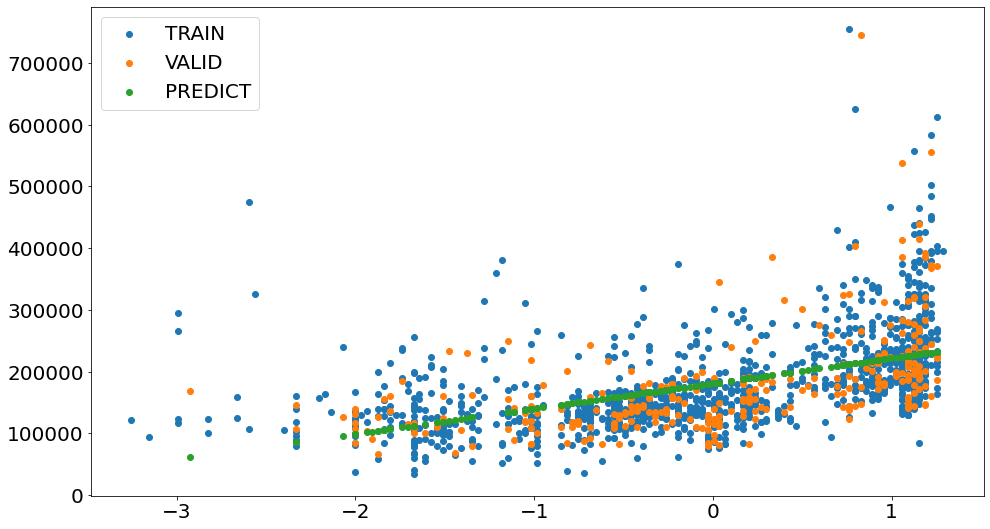

In [47]:
# sklearnを使用した予測データの視覚化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred_sklearn,label="PREDICT")
plt.legend()
plt.plot();

In [48]:
# 平均二乗誤差
mse = MSE(y_pred_sklearn, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


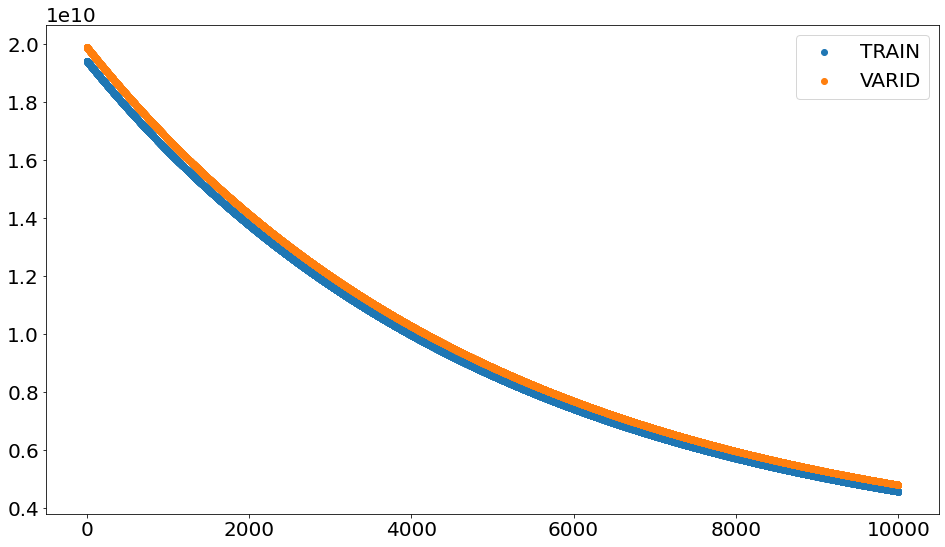

In [49]:
# 問題7:学習曲線のプロット

# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg1.loss)),reg1.loss,label='TRAIN')
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss,label='VARID')
plt.legend()
plt.plot();

In [50]:
reg3 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg3.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred3 = reg3.predict(X_valid_std)

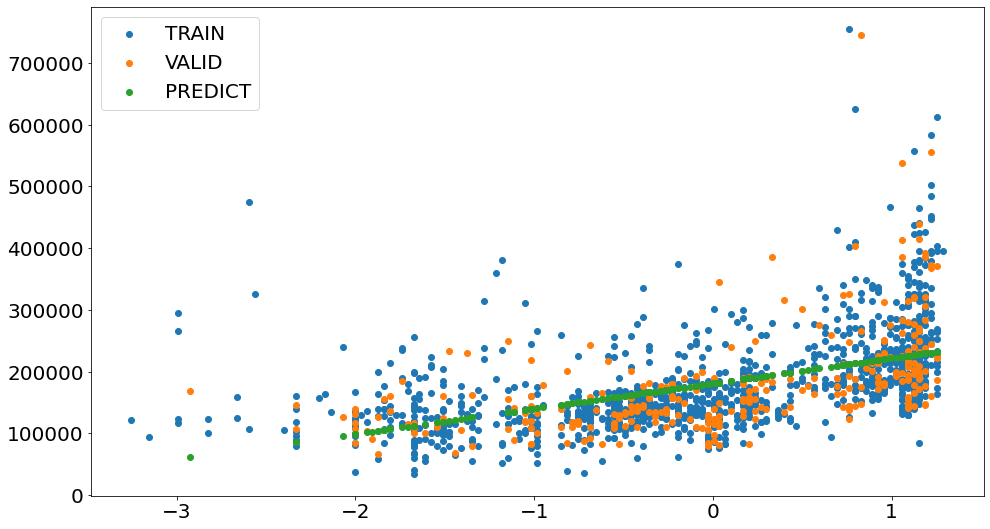

In [51]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred3,label="PREDICT")
plt.legend()
plt.plot();

In [52]:
# 平均二乗誤差
mse = MSE(y_pred3, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


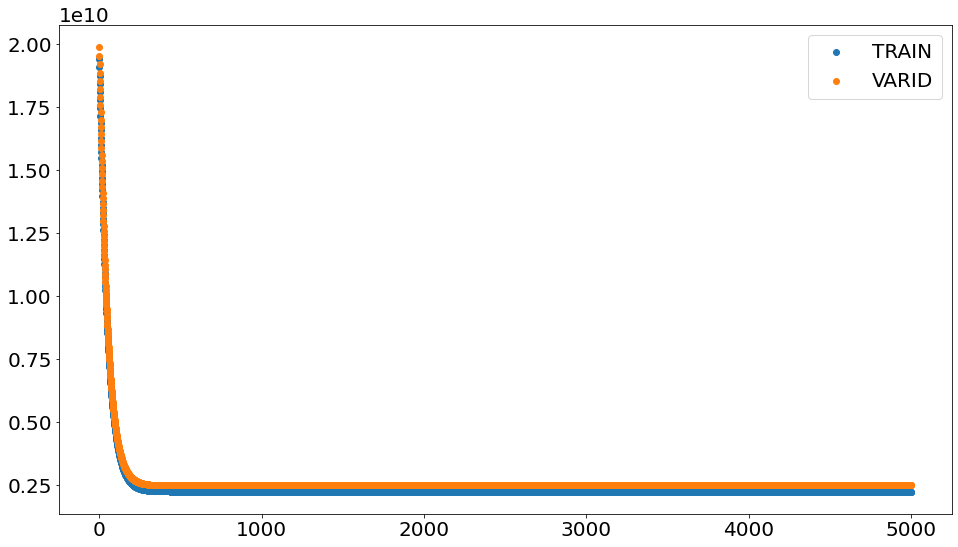

In [53]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg3.loss)),reg3.loss,label='TRAIN')
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss,label='VARID')
plt.legend()
plt.plot();

In [54]:
# 問題8:(アドバンス課題)バイアス項の除去

#　バイアス項を削除した結果を確認する
reg4 = ScratchLinearRegression(num_iter=10000, lr=0.001, no_bias=True)

reg4.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred4 = reg4.predict(X_valid_std)

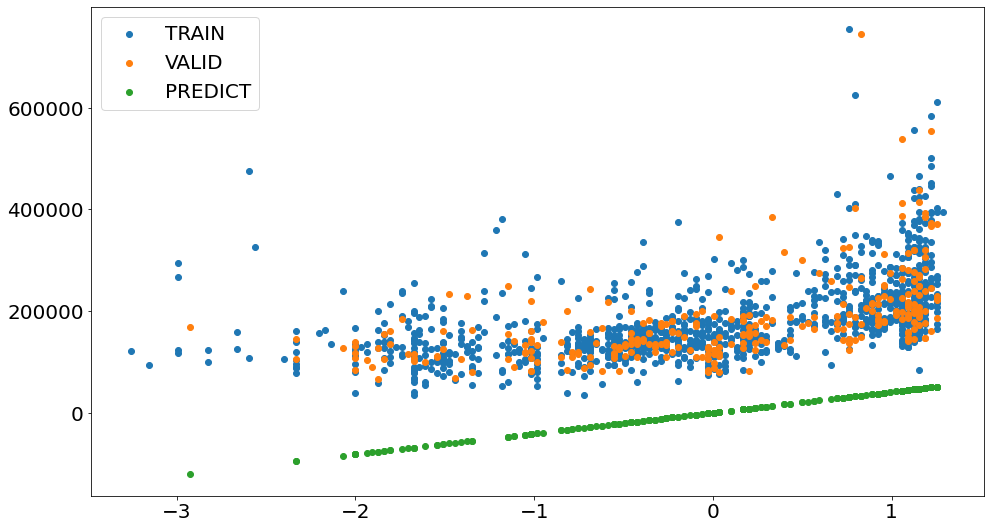

In [55]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std,y_train,label="TRAIN")
plt.scatter(X_valid_std,y_valid,label="VALID")
plt.scatter(X_valid_std,y_pred4,label="PREDICT")
plt.legend()
plt.plot();

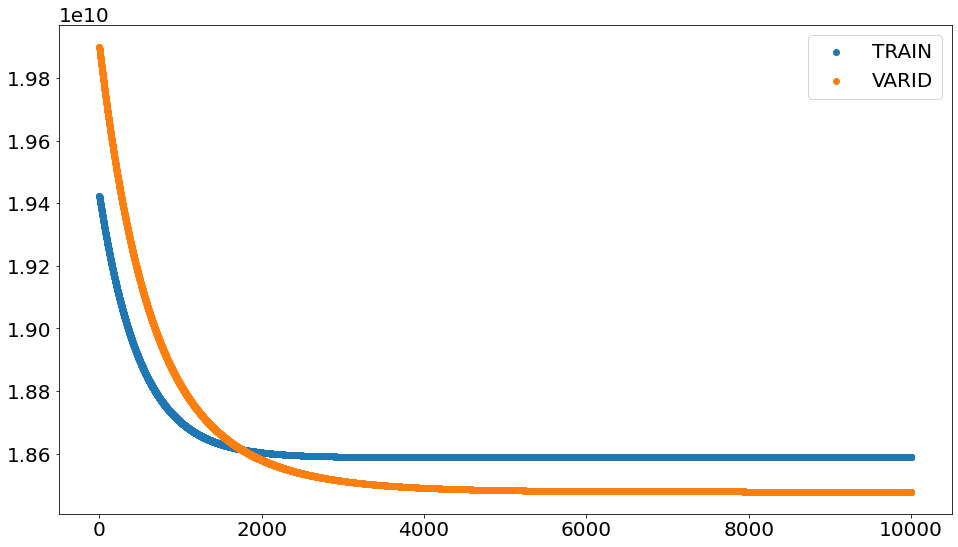

In [56]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg4.loss)),reg4.loss,label='TRAIN')
plt.scatter(range(len(reg4.val_loss)),reg4.val_loss,label='VARID')
plt.legend()
plt.plot();

In [57]:
X = train[['YearBuilt','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 2)
y.shape: (1460,)


In [58]:
# 特徴量の正方形を追加
X[:,1] = X[:,1]**2
X

array([[   2003, 4012009],
       [   1976, 3904576],
       [   2001, 4004001],
       ...,
       [   1941, 3767481],
       [   1950, 3802500],
       [   1965, 3861225]], dtype=int64)

In [59]:
# トレーニング データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_valid.shape: (292, 2)
y_valid.shape: (292,)


In [60]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [61]:
reg09 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg09.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred09 = reg09.predict(X_valid_std)

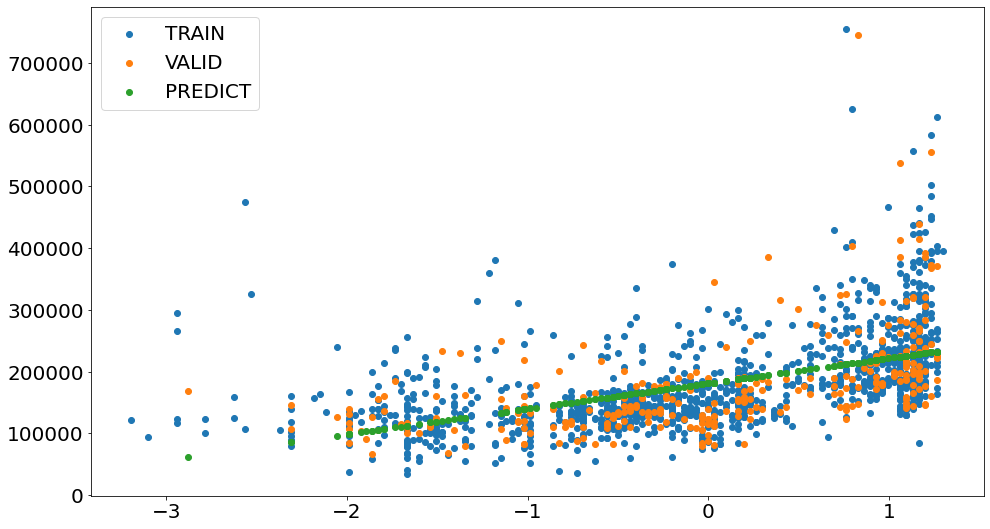

In [62]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred09,label="PREDICT")
plt.legend()
plt.plot();

In [63]:
# 平均二乗誤差
mse = MSE(y_pred09, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4971463548.6
RMSE70508.6


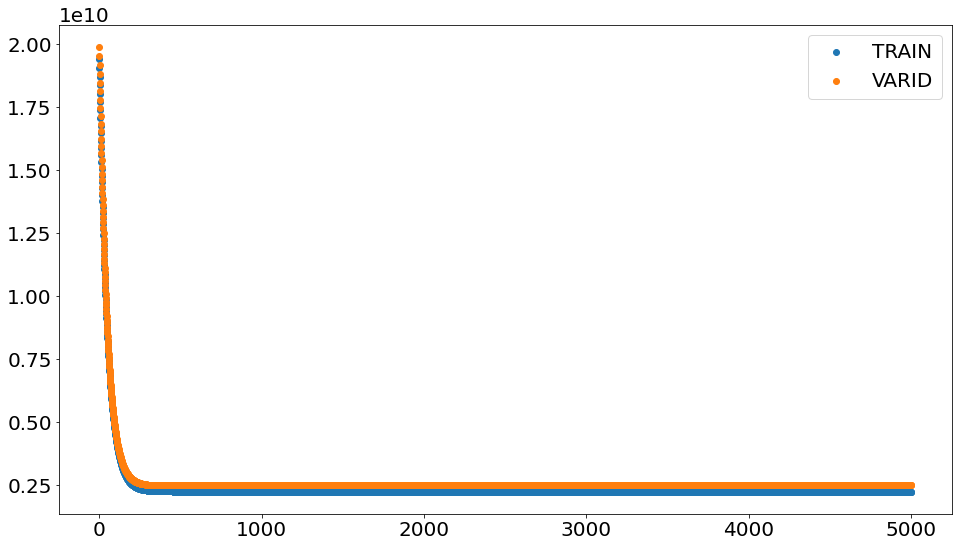

In [64]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg09.loss)),reg09.loss,label='TRAIN')
plt.scatter(range(len(reg09.val_loss)),reg09.val_loss,label='VARID')
plt.legend()
plt.plot();

In [65]:
# 特徴値に 3次元を追加します
X = train[['YearBuilt','YearBuilt','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X[:,1] = X[:,1]**2
X[:,2] = X[:,2]**3
X

X.shape: (1460, 3)
y.shape: (1460,)


array([[      2003,    4012009, 8036054027],
       [      1976,    3904576, 7715442176],
       [      2001,    4004001, 8012006001],
       ...,
       [      1941,    3767481, 7312680621],
       [      1950,    3802500, 7414875000],
       [      1965,    3861225, 7587307125]], dtype=int64)

In [66]:
# トレーニング データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 3)
y_train.shape: (1168,)
X_valid.shape: (292, 3)
y_valid.shape: (292,)


In [67]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [68]:
reg10 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg10.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred10 = reg10.predict(X_valid_std)

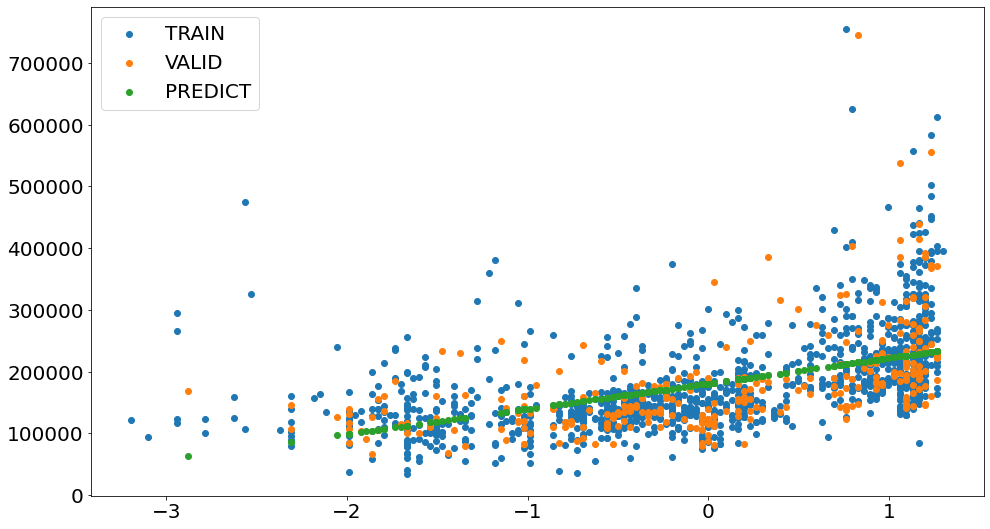

In [69]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred10,label="PREDICT")
plt.legend()
plt.plot();

In [70]:
# 平均二乗誤差
mse = MSE(y_pred10, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4960227043.6
RMSE70428.9


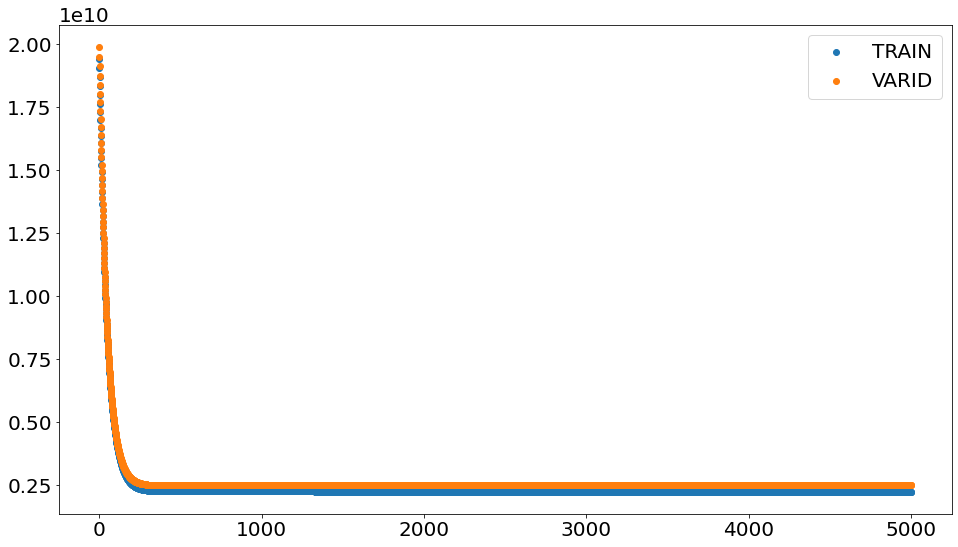

In [71]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg10.loss)),reg10.loss,label='TRAIN')
plt.scatter(range(len(reg10.val_loss)),reg10.val_loss,label='VARID')
plt.legend()
plt.plot();

In [72]:
X = train[['GrLivArea','YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (1460, 2)
y.shape: (1460,)


In [73]:
# トレーニング データと検証データに分割
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (1168, 2)
y_train.shape: (1168,)
X_valid.shape: (292, 2)
y_valid.shape: (292,)


In [74]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [75]:
reg5 = ScratchLinearRegression(num_iter=10000, lr=0.01)

reg5.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred5 = reg5.predict(X_valid_std)

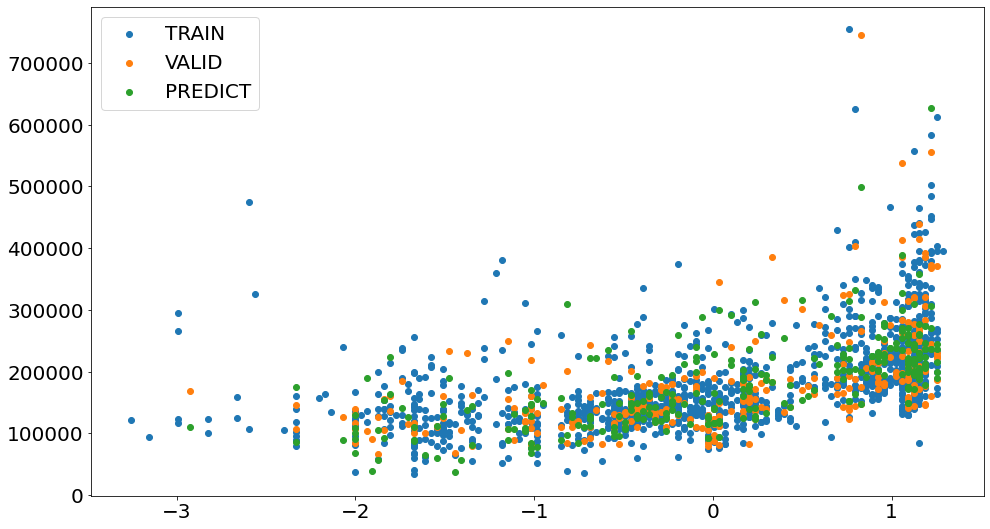

In [76]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred5,label="PREDICT")
plt.legend()
plt.plot();

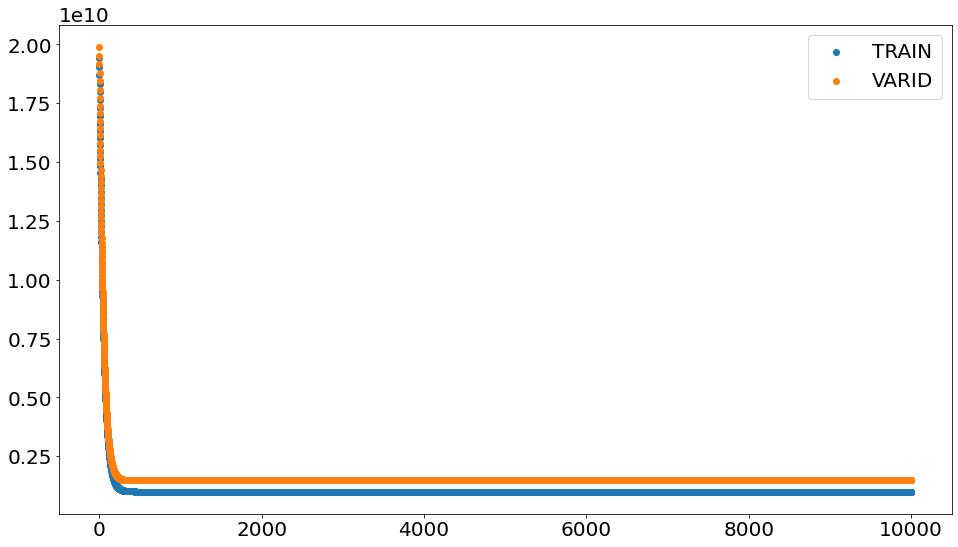

In [77]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg5.loss)),reg5.loss,label='TRAIN')
plt.scatter(range(len(reg5.val_loss)),reg5.val_loss,label='VARID')
plt.legend()
plt.plot();

In [78]:
# 平均二乗誤差
mse = MSE(y_pred5, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


In [79]:
reg6 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg6.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred6 = reg6.predict(X_valid_std)

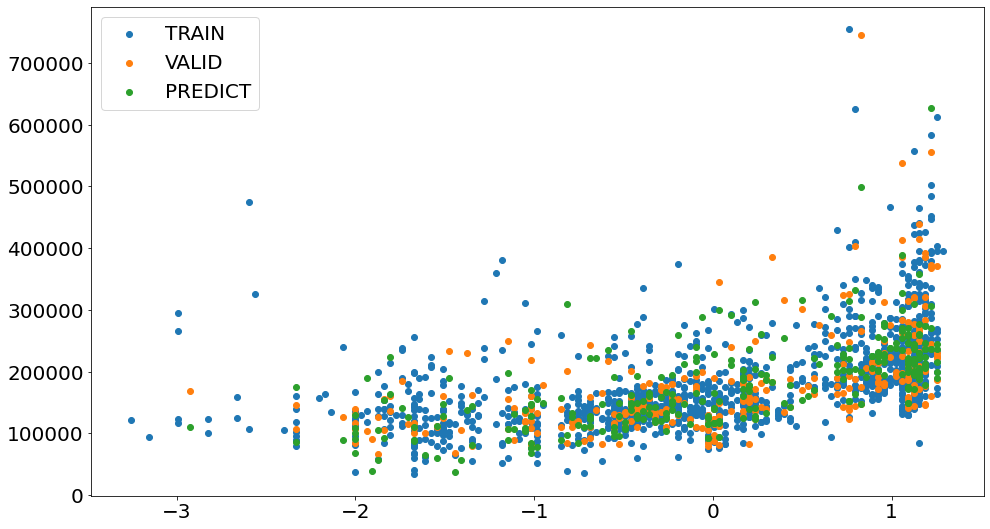

In [80]:
# トレーニング、検証、および予測データの可視化
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std[:,1],y_train,label="TRAIN")
plt.scatter(X_valid_std[:,1],y_valid,label="VALID")
plt.scatter(X_valid_std[:,1],y_pred6,label="PREDICT")
plt.legend()
plt.plot();

In [81]:
# 平均二乗誤差
mse = MSE(y_pred6, y_valid)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE2942066921.7
RMSE54240.8


In [82]:
reg6.theta

array([180808.8989726 ,  50765.58814766,  31427.62191205])